## Disease Prediction Using Six ML Algorithms, case Study of SARS-CoV-2 Symptoms Classification
>## Models used: Random forest, Xgboost, Logistic Regression, Naive Bayes, K-Nearest Neigbour, Principal Component Analysis (PCA) with Support Vector Machine and (SVM) classifier

### Introduction
Pneumonia caused by SARS-CoV-2 emerged in Wuhan, China in December 2019 and was officially named COVID-19 by the WHO on Feb 11, 2020. The disease presents with a range of symptoms, including fever, dry cough, and fatigue, and is highly contagious through respiratory droplets and direct contact. The Chinese government and scientific community have taken rapid action to identify and contain the epidemic. Machine learning algorithms are being used to diagnose and manage the spread of the virus, which is the focus of this paper. Research has provided critical information on the biology and pathogenesis of SARS-CoV-2, as well as epidemiology, clinical features, diagnosis, management, and drug and vaccine development.

### Data Description
The data set used for this machine learning process was source from [Kaggle covid-19 dataset](https://www.kaggle.com/datasets/mykeysid10/covid19-dataset-for-year-2020). However, the original source is found at [Israel Govt databases](https://data.gov.il/dataset/covid-19/resource/d337959a-020a-4ed3-84f7-fca182292308). 

The data set contained 5861480 rows and 10 columns. Columns in the set are:

test_date,cough,fever, sore_throat, shortness_of_breath, head_ache, corona_result, age_60_and_above, gender and test_indication. For this work, we shall be using all columns having symptoms and the the test_indication.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# !pip install lightgbm
# !pip install catboost

### scikit learn imports  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
### set defaults  
mpl.rcParams['agg.path.chunksize'] = 1000

# Set a general theme for plots
sns.set_theme(style="whitegrid", palette="pastel")

# Customize further if needed
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

Assigning the downloaded covid data to the variable dataframe

In [3]:
df = pd.read_csv('../datasets/covid_data_2020_2021.csv')

### Show dataframe sample 
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
4412408,2020-09-22,0,0,0,0,0,Negative,No,female,Other
3127648,2020-12-13,0,0,0,0,0,Negative,No,male,Other
3195900,2020-12-10,0,0,0,0,0,Negative,No,female,Other
5732845,2020-04-12,0,0,0,0,0,Negative,No,female,Other
1786587,2021-02-09,0,0,0,0,0,Negative,No,female,Other


## Exploratory Data Analysis (EDA)

In [4]:
### show dataframe head 
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [5]:
### Reassign integers(0 & 1) in place of Negative and Positive strings in the corona_result column 
df['corona_result'] = df['corona_result'].map({'Negative': 0, 'Positive': 1})

### check that the changes have been implemented 
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,0,Yes,female,Other
1,2021-10-11,0,0,0,0,0,0,Yes,male,Other
2,2021-10-11,0,0,0,0,0,0,No,female,Other
3,2021-10-11,0,0,0,0,0,0,Yes,female,Other
4,2021-10-11,0,0,0,0,0,0,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,0,No,female,Other
5861476,2020-03-20,0,0,0,0,0,0,No,male,Other
5861477,2020-03-20,0,0,0,0,0,0,No,female,Other
5861478,2020-03-20,0,0,0,0,0,0,No,male,Other


In [6]:
### check dataset properties 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        int64 
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(6), object(4)
memory usage: 447.2+ MB


In [7]:
df['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [8]:
### check the number of null values  
df.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

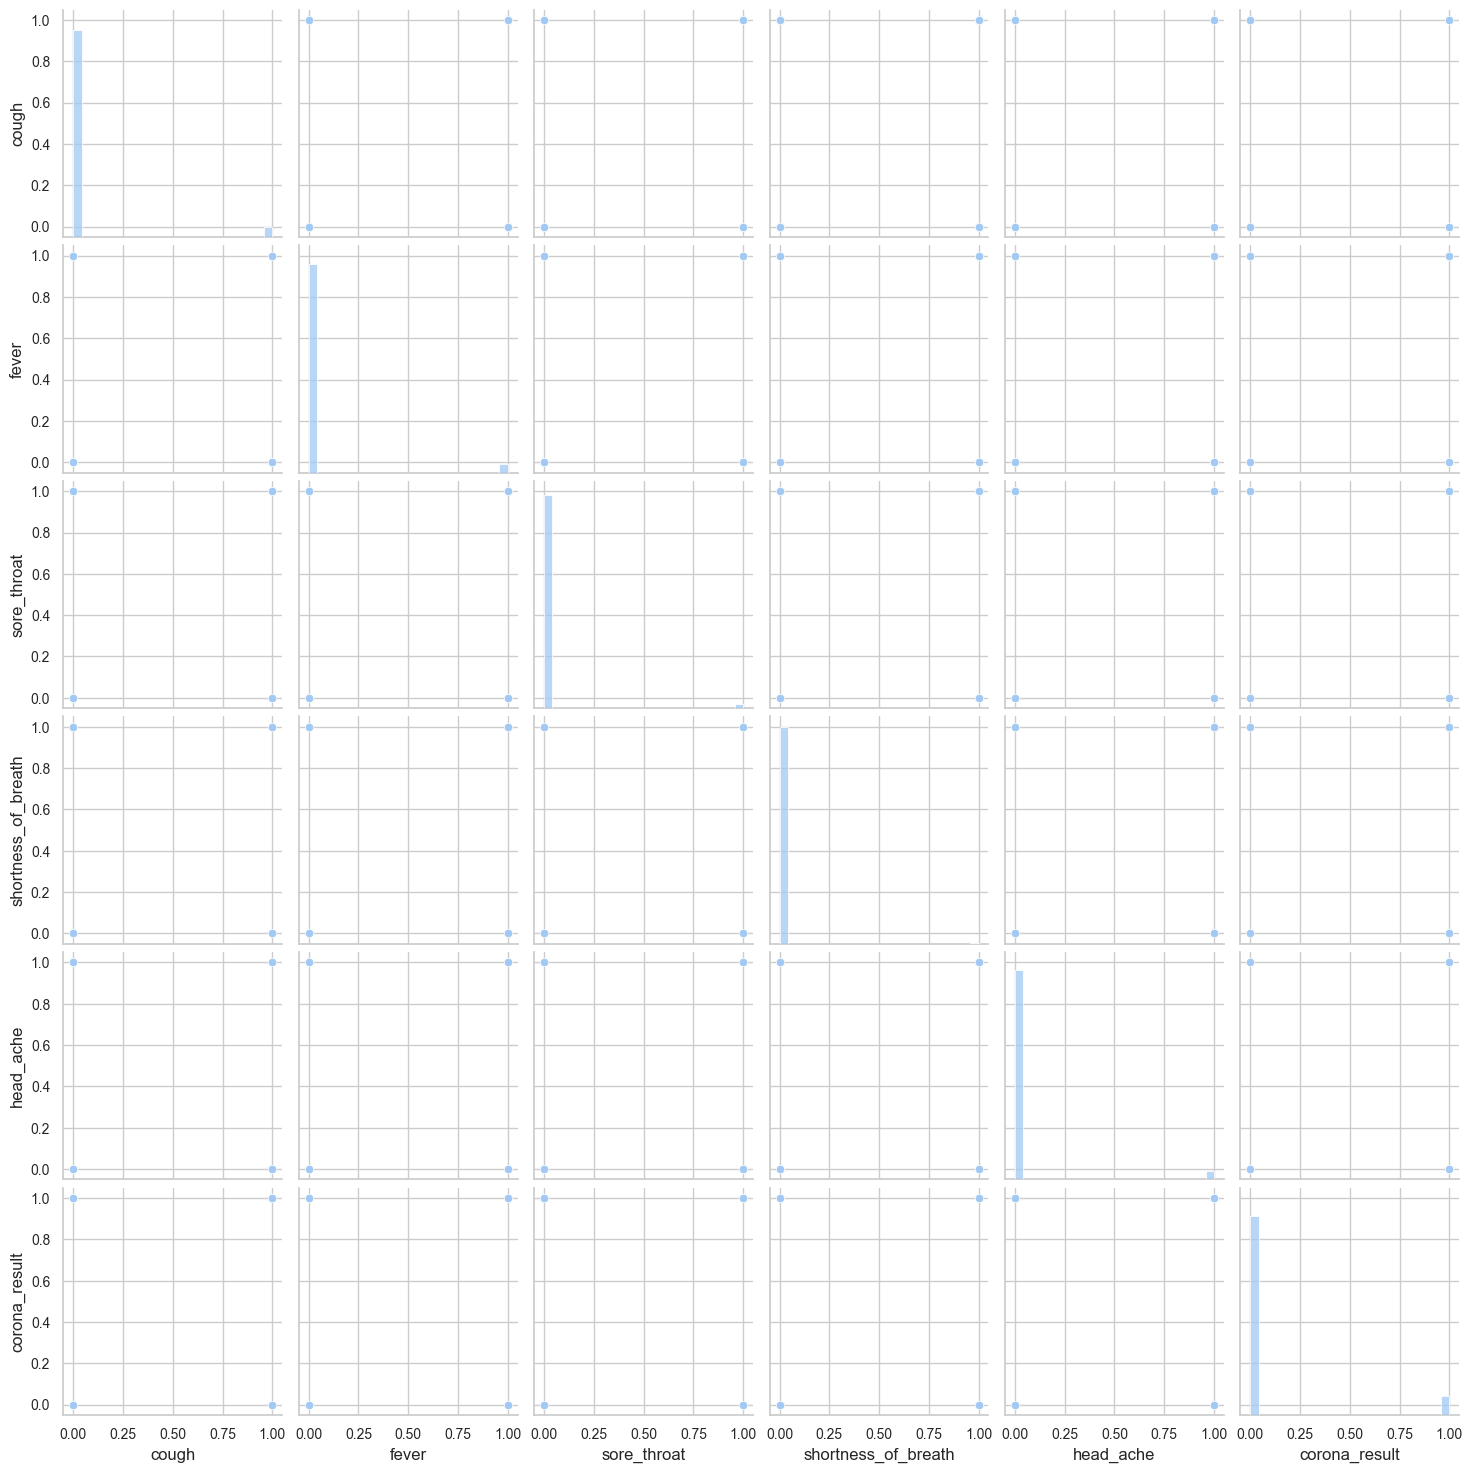

In [9]:
# sns.pairplot(df)
sns.pairplot(data = df)

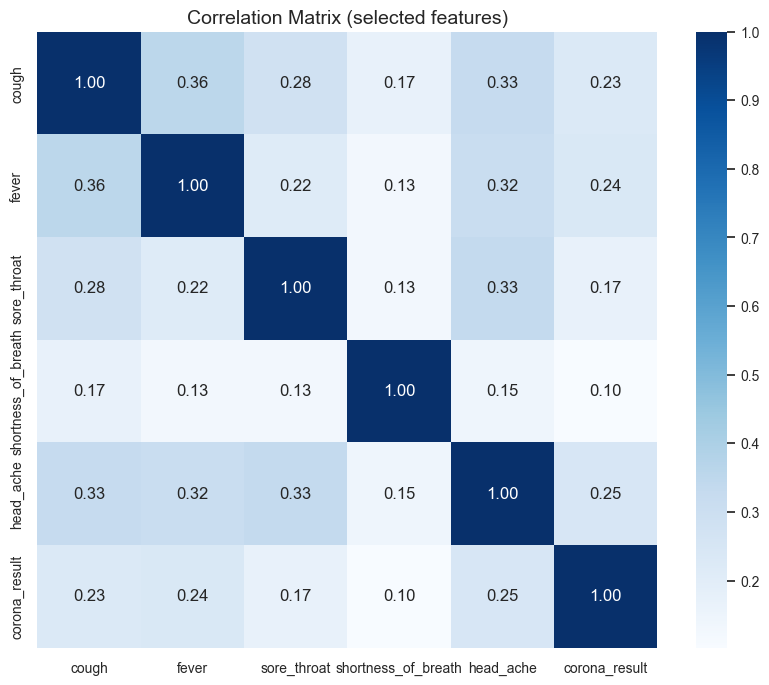

In [10]:
### Observation: Dataset is void of missing values  

### Plot correlation matrix (excluding specified columns)
columns_to_keep = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result']

# Modify the original dataframe to keep only the selected columns
df = df[columns_to_keep]

# Calculate correlation matrix
cor = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True , fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix (selected features)')
plt.show()

Text(0.5, 1.0, 'Count of corona result in dataset')

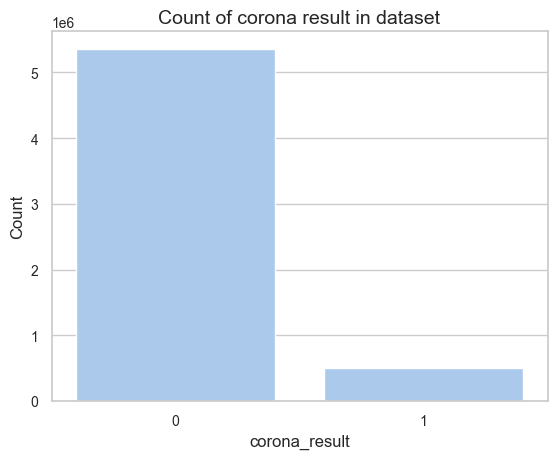

In [11]:
sns.countplot(data=df, x='corona_result',)
plt.ylabel('Count')
plt.title('Count of corona result in dataset')

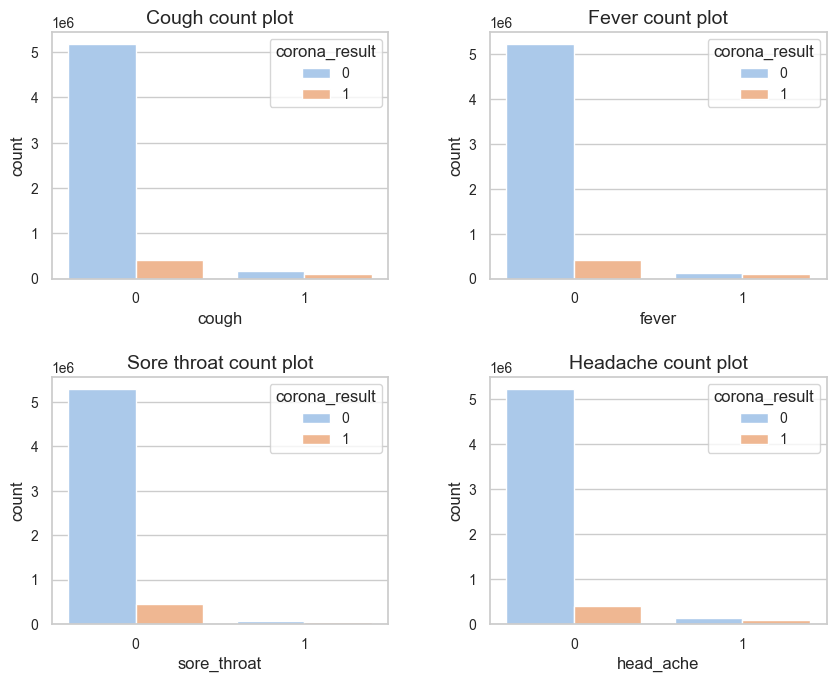

In [12]:
### create subplots to visualise the effect of direct symptoms to test result  
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

### set plots for all axes 
ax[0, 0].set_title('Cough count plot')
sns.countplot(data=df, x='cough', hue='corona_result', ax=ax[0, 0])


ax[0, 1].set_title('Fever count plot')
sns.countplot(data=df, x='fever', hue='corona_result', ax=ax[0, 1])


ax[1, 0].set_title('Sore throat count plot')
sns.countplot(data=df, x='sore_throat', hue='corona_result', ax=ax[1, 0])


ax[1, 1].set_title('Headache count plot')
sns.countplot(data=df, x='head_ache', hue='corona_result', ax=ax[1, 1])

### adjust vertical spacing for subplots
fig.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)

### show plot  
plt.show()

#### Observation: **General observation**
- Majority of cases are negative
- From sore throat case, the positive to negative ratio was higher than other symptoms, showing that soar throat was and important indicator of the infection

#### Data preparation
rest of comments here...

In [13]:
### Get target variable and independent variables 
### target 
y=df['corona_result']
### independent 
x=df.drop(['corona_result'], axis=1)

### check independent variables  
x.sample(8)


,cough,fever,sore_throat,shortness_of_breath,head_ache
4281274,0,1,0,0,0
4215377,0,0,0,0,0
3844968,0,0,0,0,0
1453108,0,0,0,0,0
2420592,0,0,0,0,0
3578638,0,0,0,0,0
1797557,0,0,0,0,0
5416873,0,0,0,0,0


In [14]:
 ### check target variable  
y.sample(8)

5114160    0
4662148    0
3232268    0
5172249    0
4618612    0
1044196    0
5685701    0
2449142    1
Name: corona_result, dtype: int64

In [15]:
### check disparity of negative and positive values in our target variable  
df['corona_result'].value_counts()

corona_result
0    5355807
1     505673
Name: count, dtype: int64

In [16]:
# !pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [17]:
# under-sampling of the class with the majority count
undersample = RandomUnderSampler(sampling_strategy = {0: 50000, 1: 50000}, random_state = 33)
x_under, y_under = undersample.fit_resample(x, y)


In [18]:
y_under.value_counts()

corona_result
0    50000
1    50000
Name: count, dtype: int64

In [19]:
### Setting  Train:Test Ratio as 80:20

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=42)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('\n')
print (y_train.value_counts())
print('\n')
print (y_test.value_counts())

(80000, 5) (20000, 5) (80000,) (20000,)


corona_result
1    40035
0    39965
Name: count, dtype: int64


corona_result
0    10035
1     9965
Name: count, dtype: int64


In [20]:
x_train

,cough,fever,sore_throat,shortness_of_breath,head_ache
2418766,0,0,0,0,0
879799,0,0,0,0,0
3767689,0,0,0,0,0
3052389,1,0,0,0,0
2130958,0,0,0,0,0
...,...,...,...,...,...
5148611,0,1,0,0,0
4591293,1,0,1,0,0
1753801,0,0,0,0,0
899533,0,0,0,0,0


In [21]:
x_test

,cough,fever,sore_throat,shortness_of_breath,head_ache
1475873,0,0,0,0,0
1520049,0,0,0,0,0
3881055,0,0,0,0,0
1575801,0,0,0,0,0
476635,0,0,0,0,0
...,...,...,...,...,...
5441788,0,0,0,0,0
1928900,0,0,0,0,0
378436,0,0,0,0,0
2331780,0,0,0,0,0


## Using Random forest 

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
639 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    e

Random Forest Classifier (with Hyperparameter Tuning)
--------------------
Accuracy: 68.43%
Precision: 87.29%
Recall: 42.88%
f1_score: 57.51%


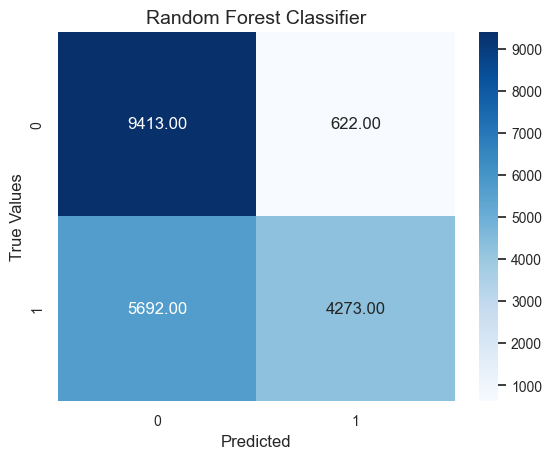

In [22]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(x_train, y_train)

# Best model from Grid Search
best_rfc = grid_search.best_estimator_

# Fitting the best model to the training data
best_rfc.fit(x_train, y_train)

# Making predictions on the testing data
y_pred = best_rfc.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)

print('Random Forest Classifier (with Hyperparameter Tuning)\n--------------------')
print(f'Accuracy: {round(accuracy_rf * 100, 2)}%')
print(f'Precision: {round(precision_rf * 100, 2)}%')
print(f'Recall: {round(recall_rf * 100, 2)}%')
print(f'f1_score: {round(f1_score_rf * 100, 2)}%')

# Plot the confusion matrix for Random Forest Classifier
matx = confusion_matrix(y_test, y_pred)
sns.heatmap(matx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Random Forest Classifier')
plt.show()


## XG Boost Model

Fitting 3 folds for each of 81 candidates, totalling 243 fits
XGBoost Classifier with Hyperparameter Tuning
--------------------
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.7}
Accuracy: 68.43%
Precision: 74.76%
Recall: 68.43%
F1 Score: 66.23%


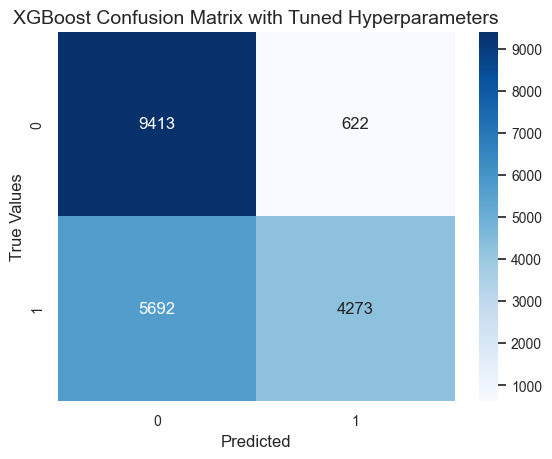

In [23]:
# from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# import numpy as np

# Define the model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best model with tuned hyperparameters
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
xgy_pred = best_xgb_model.predict(x_test)

# Calculate metrics
accuracy2 = accuracy_score(y_test, xgy_pred)
precision2 = precision_score(y_test, xgy_pred, average='weighted')
recall2 = recall_score(y_test, xgy_pred, average='weighted')
f1_score2 = f1_score(y_test, xgy_pred, average='weighted')

# Print the results
print('XGBoost Classifier with Hyperparameter Tuning\n--------------------')
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {round(accuracy2 * 100, 2)}%')
print(f'Precision: {round(precision2 * 100, 2)}%')
print(f'Recall: {round(recall2 * 100, 2)}%')
print(f'F1 Score: {round(f1_score2 * 100, 2)}%')

# Plot the confusion matrix
matx = confusion_matrix(y_test, xgy_pred)
sns.heatmap(matx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('XGBoost Confusion Matrix with Tuned Hyperparameters')
plt.show()



# LOGISTICS REGRESSION MODEL

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    retur

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Classifier with Hyperparameter Tuning
--------------------------------------------------------
Accuracy: 68.43%
Precision: 74.76%
Recall: 68.43%
F1 Score: 66.23%


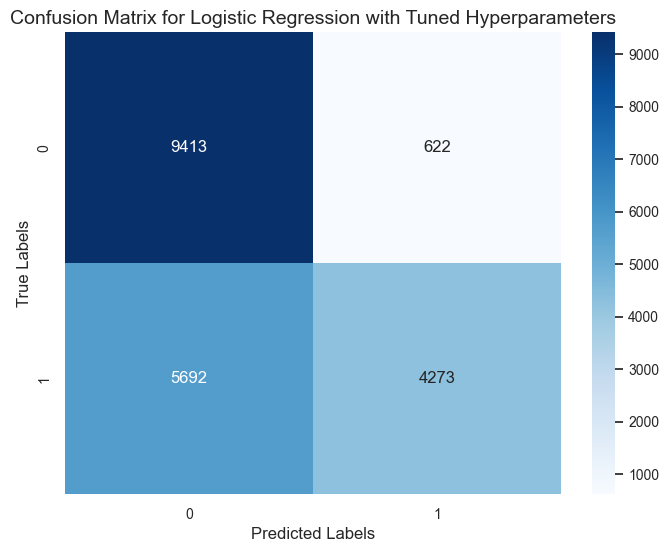

In [24]:
 
# Define the hyperparameter grid with compatible penalty and solver combinations
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],      # Regularization techniques
    'solver': ['liblinear', 'saga']             # Optimization algorithms compatible with the penalties
}

# Initialize Logistic Regression (leave parameters as default for tuning)
logreg = LogisticRegression(max_iter=500)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',                         # Change to 'precision_weighted' if needed
    cv=5,                                       # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                                   # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Logistic Regression model using the best hyperparameters
logreg_best = LogisticRegression(**best_params, max_iter=500)
logreg_best.fit(x_train, y_train)

# Make predictions on the test data with the tuned model
lry_pred = logreg_best.predict(x_test)

# Calculate performance metrics
accuracy3 = accuracy_score(y_test, lry_pred)
precision3 = precision_score(y_test, lry_pred, average='weighted')
recall3 = recall_score(y_test, lry_pred, average='weighted')
f1_score3 = f1_score(y_test, lry_pred, average='weighted')

# Print the results
print('\nLogistic Regression Classifier with Hyperparameter Tuning\n--------------------------------------------------------')
print(f'Accuracy: {round(accuracy3 * 100, 2)}%')
print(f'Precision: {round(precision3 * 100, 2)}%')
print(f'Recall: {round(recall3 * 100, 2)}%')
print(f'F1 Score: {round(f1_score3 * 100, 2)}%')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, lry_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression with Tuned Hyperparameters')
plt.show()


## NAIVE BAYES CLASSIFIER MODEL

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'var_smoothing': 1e-09}

Gaussian Naive Bayes Classifier with Hyperparameter Tuning
--------------------------------------------------------
Accuracy: 68.43%
Precision: 74.81%
Recall: 68.34%
F1 Score: 66.2%


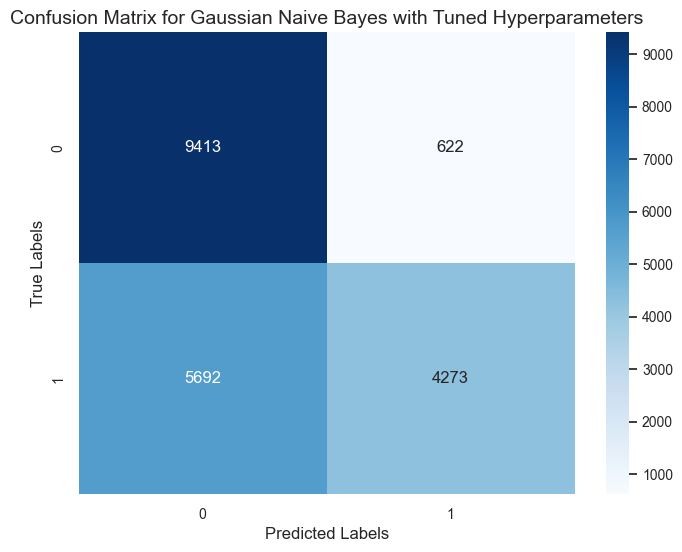

In [25]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the grid of hyperparameters to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Range of smoothing parameters
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='accuracy',  # You can change this to 'precision', 'recall', 'f1', etc.
    cv=5,                # 5-fold cross-validation
    verbose=2,           # To show the progress
    n_jobs=-1            # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_gnb = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_gnb.fit(x_train, y_train)

# Make predictions on the test set
gnb_y_pred = best_gnb.predict(x_test)

# Calculate performance metrics
accuracy4 = accuracy_score(y_test, gnb_y_pred)
precision4 = precision_score(y_test, gnb_y_pred, average='macro')  # Use 'macro' for multi-class
recall4 = recall_score(y_test, gnb_y_pred, average='macro')
f1_score4 = f1_score(y_test, gnb_y_pred, average='macro')

# Print the results
print('\nGaussian Naive Bayes Classifier with Hyperparameter Tuning\n--------------------------------------------------------')
print(f'Accuracy: {round(accuracy4 * 100, 2)}%')
print(f'Precision: {round(precision4 * 100, 2)}%')
print(f'Recall: {round(recall4 * 100, 2)}%')
print(f'F1 Score: {round(f1_score4 * 100, 2)}%')

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, gnb_y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes with Tuned Hyperparameters')
plt.show()


## K-NEAREST NEIGBOUR CLASSIFIER MODEL

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



K-Nearest Neighbors Classifier with Hyperparameter Tuning
------------------------------------------------------
Accuracy: 49.83%
Precision: 24.83%
Recall: 49.82%
F1 Score: 33.14%


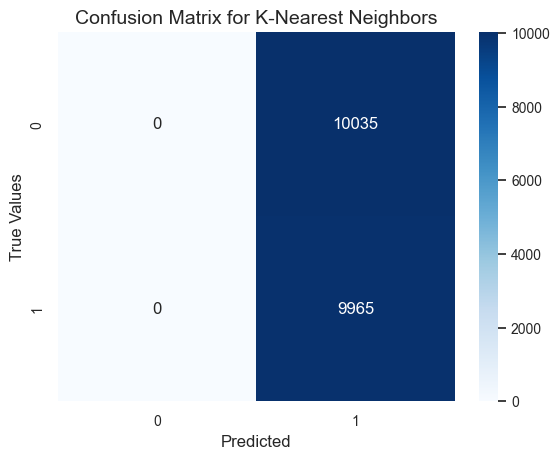

In [26]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': list(range(1, 11)),       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],      # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',                      # You can change to 'precision_weighted', etc.
    cv=5,                                    # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                                # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the KNN model using the best hyperparameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(x_train, y_train)

# Make predictions on the test data with the tuned model
knn_y_pred = knn_best.predict(x_test)

# Calculate performance metrics
accuracy_knn = accuracy_score(y_test, knn_y_pred)
precision_knn = precision_score(y_test, knn_y_pred, average='weighted')
recall_knn = recall_score(y_test, knn_y_pred, average='weighted')
f1_knn = f1_score(y_test, knn_y_pred, average='weighted')

# Print the results
print('\nK-Nearest Neighbors Classifier with Hyperparameter Tuning\n------------------------------------------------------')
print(f'Accuracy: {round(accuracy_knn * 100, 2)}%')
print(f'Precision: {round(precision_knn * 100, 2)}%')
print(f'Recall: {round(recall_knn * 100, 2)}%')
print(f'F1 Score: {round(f1_knn * 100, 2)}%')

# Plot the confusion matrix
matx_knn = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(matx_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


## PCA WITH SUPPORT VECTOR MACHINE (SVM) CLASSIFIER MODEL


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Support Vector Machine with PCA and Hyperparameter Tuning
------------------------------------------------------
Accuracy: 68.43%
Precision: 74.76%
Recall: 68.43%
F1 Score: 66.23%


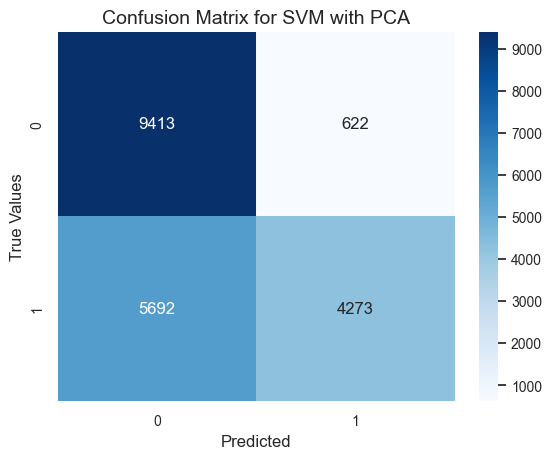

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Keep 5 principal components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Initialize the SVM model
svm_model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types: linear, radial basis function, and polynomial
    'gamma': ['scale', 'auto']           # Kernel coefficient
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',                 # Change the scoring metric if needed
    cv=5,                               # 5-fold cross-validation
    verbose=2,
    n_jobs=-1                           # Use all available cores
)

# Fit the grid search to the PCA-transformed training data
grid_search.fit(x_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the SVM model using the best hyperparameters
svm_best = SVC(**best_params)
svm_best.fit(x_train_pca, y_train)

# Make predictions on the PCA-transformed test data
svm_y_pred_pca = svm_best.predict(x_test_pca)

# Calculate performance metrics
accuracy_svm_pca = accuracy_score(y_test, svm_y_pred_pca)
precision_svm_pca = precision_score(y_test, svm_y_pred_pca, average='weighted')
recall_svm_pca = recall_score(y_test, svm_y_pred_pca, average='weighted')
f1_svm_pca = f1_score(y_test, svm_y_pred_pca, average='weighted')

# Print the results
print('\nSupport Vector Machine with PCA and Hyperparameter Tuning\n------------------------------------------------------')
print(f'Accuracy: {round(accuracy_svm_pca * 100, 2)}%')
print(f'Precision: {round(precision_svm_pca * 100, 2)}%')
print(f'Recall: {round(recall_svm_pca * 100, 2)}%')
print(f'F1 Score: {round(f1_svm_pca * 100, 2)}%')

# Plot the confusion matrix
matx_svm_pca = confusion_matrix(y_test, svm_y_pred_pca)
sns.heatmap(matx_svm_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Values')
plt.title('Confusion Matrix for SVM with PCA')
plt.show()


## Summary of all 6 Accuracies, Recalls, Precisions and f1 scores

In [28]:
# Print and compare all 6 Accuracies, Recalls, Precisions and f1 scores...
models = ['Random Forest Model', 'XGBoost Model', 'Logistics Regression Model', 'Naive Bayes Model', 'K-Nearest Neighbors Classifier', 'Support Vector Machine with PCA']
accuracies = [accuracy_rf, accuracy2, accuracy3, accuracy4, accuracy_knn, accuracy_svm_pca]
recalls = [recall_rf, recall2, recall3, recall4, recall_knn, recall_svm_pca]
precisions = [precision_rf, precision2, precision3, precision4, precision_knn, precision_svm_pca]
f1_scores = [f1_score_rf, f1_score2, f1_score3, f1_score4, f1_knn, f1_svm_pca]

for i in range(0, 6):
    print(f'{models[i]} Metrics with Hyperparameter Tuning:\n----------------------')
    print(f'Accuracy: {round(accuracies[i] * 100, 2)}%')
    print(f'Recall: {round(recalls[i] * 100, 2)}%')
    print(f'Precision: {round(precisions[i] * 100, 2)}%')
    print(f'F1 score: {round(f1_scores[i] * 100, 2)}%\n\n')

Random Forest Model Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 68.43%
Recall: 42.88%
Precision: 87.29%
F1 score: 57.51%


XGBoost Model Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 68.43%
Recall: 68.43%
Precision: 74.76%
F1 score: 66.23%


Logistics Regression Model Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 68.43%
Recall: 68.43%
Precision: 74.76%
F1 score: 66.23%


Naive Bayes Model Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 68.43%
Recall: 68.34%
Precision: 74.81%
F1 score: 66.2%


K-Nearest Neighbors Classifier Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 49.83%
Recall: 49.82%
Precision: 24.83%
F1 score: 33.14%


Support Vector Machine with PCA Metrics with Hyperparameter Tuning:
----------------------
Accuracy: 68.43%
Recall: 68.43%
Precision: 74.76%
F1 score: 66.23%




In [29]:
# Generate the classification report

# Random Forest Classification Report
print("\nRandom Forest Classification Report:")
print("-" * 40)
report = classification_report(y_test, y_pred)
print(report)

# XGBoost Classification Report
print("\nXGBoost Classification Report:")
print("-" * 40)
report = classification_report(y_test, xgy_pred)
print(report)

# Logistic Regression Classification Report
print("\nLogistic Regression Classification Report:")
print("-" * 40)
report = classification_report(y_test, lry_pred)
print(report)

# Naive Bayes Classification Report
print("\nNaive Bayes Classification Report:")
print("-" * 40)
report = classification_report(y_test, gnb_y_pred)
print(report)

# K-Nearest Neighbors Classification Report
print("\nK-Nearest Neighbors Classification Report:")
print("-" * 40)
report = classification_report(y_test, knn_y_pred)
print(report)

# PCA with SVM Classification Report
print("\nPCA with Support Vector Machine (SVM) Classification Report:")
print("-" * 40)
report = classification_report(y_test, svm_y_pred_pca)
print(report)


Random Forest Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     10035
           1       0.87      0.43      0.58      9965

    accuracy                           0.68     20000
   macro avg       0.75      0.68      0.66     20000
weighted avg       0.75      0.68      0.66     20000


XGBoost Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     10035
           1       0.87      0.43      0.58      9965

    accuracy                           0.68     20000
   macro avg       0.75      0.68      0.66     20000
weighted avg       0.75      0.68      0.66     20000


Logistic Regression Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.94      0.75     10035


C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Edward Osikem\Documents\projects\dissertation\DiseasePrediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_